In [13]:
import pickle
import numpy as np
import itertools as it
import matplotlib.pylab as plt
import seaborn as sns
from pprint import pprint
from myutils import *

%config InlineBackend.figure_format = 'retina'  # 提高 jupyter notebook 的圖形顯示解析度

In [48]:
def annotate_heatmap(data, ax, font_colors=None, show_upper_triangle=False, show_diag=False):
    rows, cols = data.shape
    for i in range(rows):
        for j in range(cols):
            value = data[i, j]
            
            if not show_upper_triangle and (j > i):
                continue  # Skip upper triangle
            
            if not show_diag and (i == j):
                continue  # Skip main diagonal
            
            if np.isnan(value):
                continue
            
            fontweight = 'normal'
            
            if font_colors is None:
                color = 'white'
            else:
                color = font_colors[i, j]
                if color == 'green':
                    fontweight = 'bold'
            
            ax.text(j + 0.5, i + 0.5, f'{value:.3g}', ha='center', va='center', color=color, fontweight=fontweight, fontsize=9.5)

def calculate_ranks(data, diag=True):
    
    if not diag:
        # 創建對角線 mask
        diag_mask = np.eye(data.shape[0], dtype=bool)
        
        # 過濾掉零元素和對角線元素
        non_zero_data = data[~diag_mask & (data != 0)]
    else:
        # 平展數據並過濾掉零元素
        flat_data = data.flatten()
        non_zero_data = flat_data[flat_data != 0]

    # 對非零元素進行排序並計算排名
    sorted_indices = np.argsort(non_zero_data)
    ranks = np.zeros_like(non_zero_data)
    ranks[sorted_indices] = np.arange(1, len(non_zero_data) + 1)

    if not diag:
        # 對非零非對角線元素進行排序並計算排名
        sorted_indices = np.argsort(non_zero_data)
        ranks = np.zeros_like(non_zero_data)
        ranks[sorted_indices] = np.arange(1, len(non_zero_data) + 1)

        # 創建一個與原始數據相同大小的陣列來存儲排名結果
        ranked_data = np.zeros_like(data, dtype=float)
        ranked_data[~diag_mask & (data != 0)] = ranks
    else:
        # 創建一個與原始數據相同大小的陣列來存儲排名結果
        ranked_data = np.zeros_like(flat_data)
        ranked_data[flat_data != 0] = ranks

        # 將平展的排名結果重塑為原始數據的形狀
        ranked_data = ranked_data.reshape(data.shape)
    
    return ranked_data

def set_font_colors(data1, data2):
    rows, cols = data1.shape
    font_colors = np.empty_like(data1, dtype=object)
    
    for k in range(rows):
        for l in range(cols):
            if data1.T[k][l] == data2.T[k][l]:
                font_colors[k, l] = 'green'
            else:
                font_colors[k, l] = 'white'
    
    return font_colors


# BR

In [49]:
dr_res_filepath = "/home/wmnlab/jackbedford/udp-reliability-research/handover_profiling/20240417_1333007d66_new_data_sync_v2/dr_20240417_1452001e84_anchor_by_event/dl_lost/results/BR_mle_20240417_1636000_b9ecf_iter2.pkl"
sr_res_filepath = "/home/wmnlab/jackbedford/udp-reliability-research/handover_profiling/20240417_1333007d66_new_data_sync_v2/sr/dl_lost/results/BR_20240417_1444000_d7cac_iter5.pkl"
with open(dr_res_filepath, 'rb') as f:
    dr_res = pickle.load(f)
with open(sr_res_filepath, 'rb') as f:
    sr_res = pickle.load(f)

scmehes: ['All.0', 'All.1', 'B1B3', 'B1B7', 'B1B8', 'B3B7', 'B3B8', 'B7B8', 'LTE']
mtags: [['All.0+All.0', 'All.0+All.1', 'All.0+B1B3', 'All.0+B1B7', 'All.0+B1B8', 'All.0+B3B7', 'All.0+B3B8', 'All.0+B7B8', 'All.0+LTE'], [0, 'All.1+All.1', 'All.1+B1B3', 'All.1+B1B7', 'All.1+B1B8', 'All.1+B3B7', 'All.1+B3B8', 'All.1+B7B8', 'All.1+LTE'], [0, 0, 'B1B3+B1B3', 'B1B3+B1B7', 'B1B3+B1B8', 'B1B3+B3B7', 'B1B3+B3B8', 'B1B3+B7B8', 'B1B3+LTE'], [0, 0, 0, 'B1B7+B1B7', 'B1B7+B1B8', 'B1B7+B3B7', 'B1B7+B3B8', 'B1B7+B7B8', 'B1B7+LTE'], [0, 0, 0, 0, 'B1B8+B1B8', 'B1B8+B3B7', 'B1B8+B3B8', 'B1B8+B7B8', 'B1B8+LTE'], [0, 0, 0, 0, 0, 'B3B7+B3B7', 'B3B7+B3B8', 'B3B7+B7B8', 'B3B7+LTE'], [0, 0, 0, 0, 0, 0, 'B3B8+B3B8', 'B3B8+B7B8', 'B3B8+LTE'], [0, 0, 0, 0, 0, 0, 0, 'B7B8+B7B8', 'B7B8+LTE'], [0, 0, 0, 0, 0, 0, 0, 0, 'LTE+LTE']]
gt_dict: {'All.0+All.0': 1.5002415533876352, 'All.1+All.1': 1.5684183408996208, 'B1B3+B1B3': 1.3421195031924757, 'B1B7+B1B7': 1.0582398451775263, 'B1B8+B1B8': 1.3008523869794488, 'B3B7+B3B

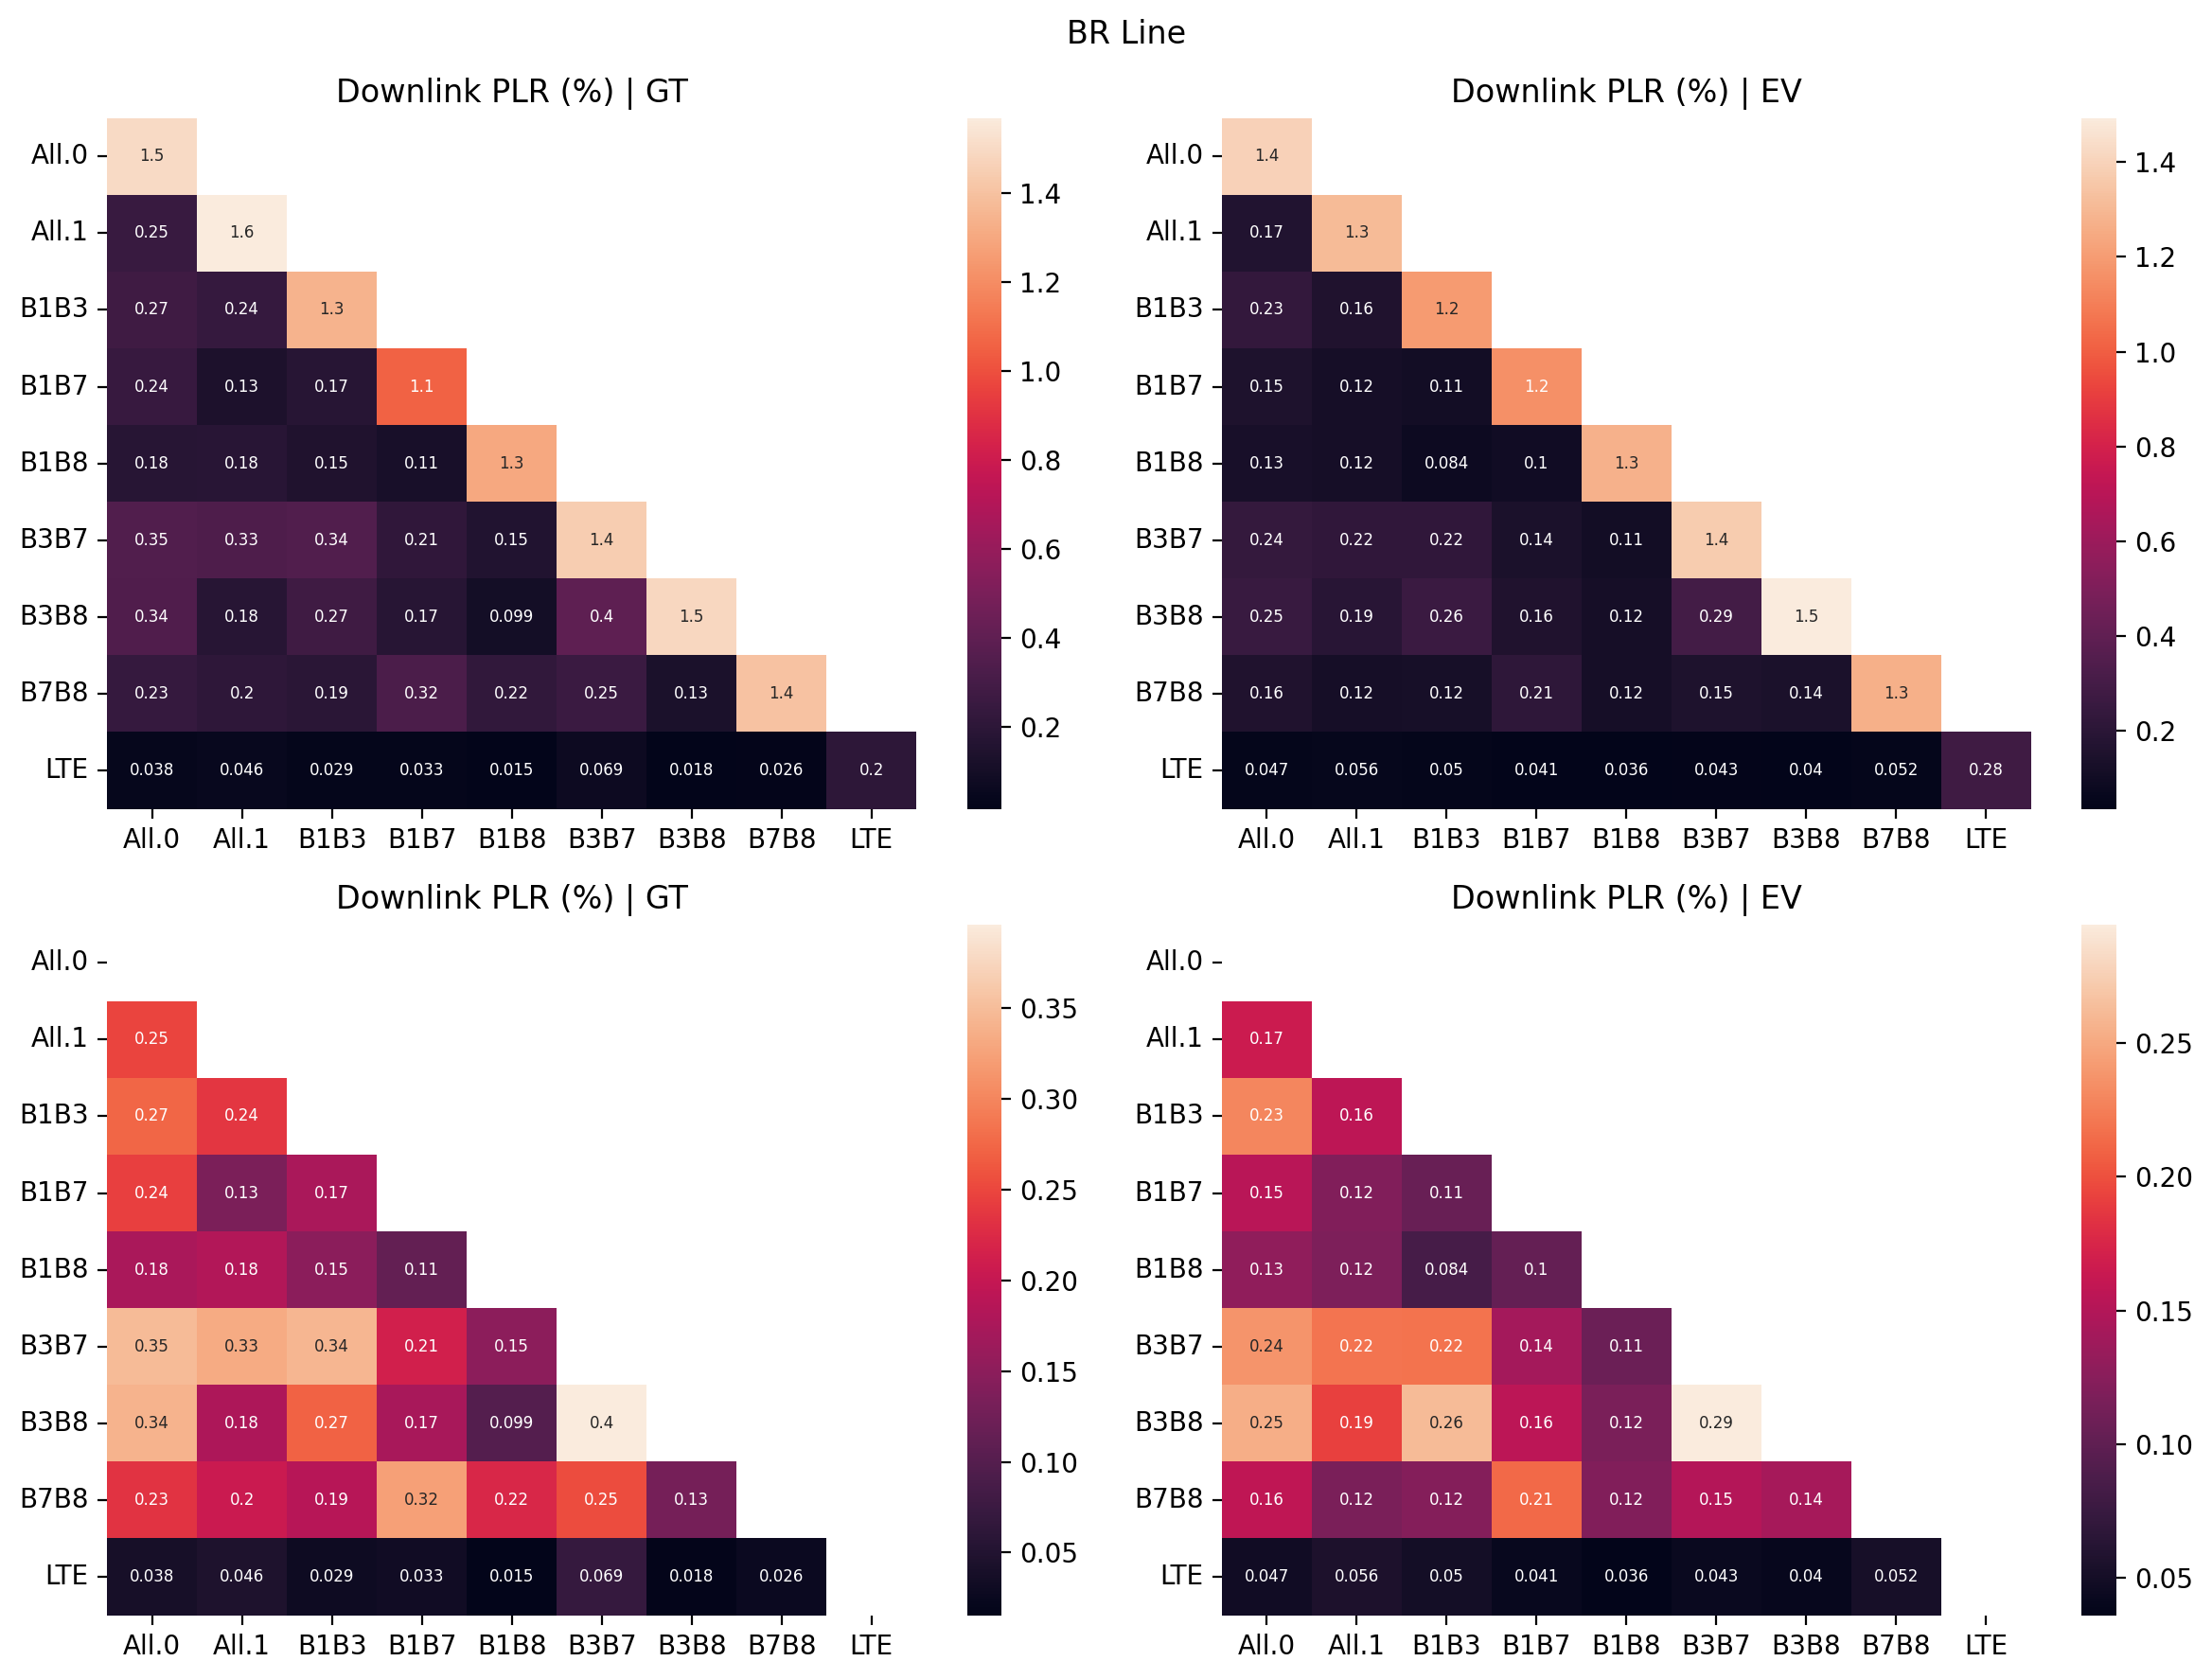

In [50]:
# Format Settings

devices = [f'sm{i:02d}' for i in range(9)]
schemes = ['All.0', 'All.1', 'B1B3', 'B1B7', 'B1B8', 'B3B7', 'B3B8', 'B7B8', 'LTE']
mapping = {key: schm for key, schm in zip(devices, schemes)}

print('scmehes:', schemes)

xs = list(it.product(schemes, repeat=2))
xs = ['+'.join([s[0], s[1]]) for s in xs]
xs = np.reshape(xs, (len(schemes), len(schemes)))
mtags = masked(xs.tolist(), mask(len(schemes), mode='upper'))

print('mtags:', mtags)

# Collect Data

gt_dict = {}

for i, item in enumerate(sr_res):
    dev = item[5]
    key = mapping[dev] + '+' + mapping[dev]
    try:
        gt_dict[key].append(item[3])
    except:
        gt_dict[key] = [item[3]]

for i, item in enumerate(dr_res):
    dev1, dev2 = item[5][:4], item[5][5:]
    key = mapping[dev1] + '+' + mapping[dev2]
    try:
        gt_dict[key].append(item[3])
    except:
        gt_dict[key] = [item[3]]
    
gt_dict = {key: np.mean(lst) for key, lst in gt_dict.items()}

print('gt_dict:', gt_dict)

ev_dict = {}

for i, item in enumerate(sr_res):
    dev = item[5]
    key = mapping[dev] + '+' + mapping[dev]
    try:
        ev_dict[key].append(item[1])
    except:
        ev_dict[key] = [item[1]]

for i, item in enumerate(dr_res):
    dev1, dev2 = item[5][:4], item[5][5:]
    key = mapping[dev1] + '+' + mapping[dev2]
    try:
        ev_dict[key].append(item[1])
    except:
        ev_dict[key] = [item[1]]
    
ev_dict = {key: np.mean(lst) for key, lst in ev_dict.items()}

print('ev_dict:', ev_dict)

# Plot

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# 有對角線
mat = fill_out_matrix(schemes, mtags, gt_dict)
sns.heatmap(mat.T, annot=True, fmt='.2g', mask=mask(len(schemes)), annot_kws={"size": 6}, ax=axes[0][0])
axes[0][0].set_title('Downlink PLR (%) | GT')

mat = fill_out_matrix(schemes, mtags, ev_dict)
sns.heatmap(mat.T, annot=True, fmt='.2g', mask=mask(len(schemes)), annot_kws={"size": 6}, ax=axes[0][1])
axes[0][1].set_title('Downlink PLR (%) | EV')

# 無對角線
mat = fill_out_matrix(schemes, mtags, gt_dict)
sns.heatmap(mat.T, annot=True, fmt='.2g', mask=mask(len(schemes), diag=False), annot_kws={"size": 6}, ax=axes[1][0])
axes[1][0].set_title('Downlink PLR (%) | GT')

mat = fill_out_matrix(schemes, mtags, ev_dict)
sns.heatmap(mat.T, annot=True, fmt='.2g', mask=mask(len(schemes), diag=False), annot_kws={"size": 6}, ax=axes[1][1])
axes[1][1].set_title('Downlink PLR (%) | EV')

fig.suptitle('BR Line')
plt.tight_layout()
plt.show()
plt.close(fig)

scmehes: ['All.0', 'All.1', 'B1B3', 'B1B7', 'B1B8', 'B3B7', 'B3B8', 'B7B8', 'LTE']
mtags: [['All.0+All.0', 'All.0+All.1', 'All.0+B1B3', 'All.0+B1B7', 'All.0+B1B8', 'All.0+B3B7', 'All.0+B3B8', 'All.0+B7B8', 'All.0+LTE'], [0, 'All.1+All.1', 'All.1+B1B3', 'All.1+B1B7', 'All.1+B1B8', 'All.1+B3B7', 'All.1+B3B8', 'All.1+B7B8', 'All.1+LTE'], [0, 0, 'B1B3+B1B3', 'B1B3+B1B7', 'B1B3+B1B8', 'B1B3+B3B7', 'B1B3+B3B8', 'B1B3+B7B8', 'B1B3+LTE'], [0, 0, 0, 'B1B7+B1B7', 'B1B7+B1B8', 'B1B7+B3B7', 'B1B7+B3B8', 'B1B7+B7B8', 'B1B7+LTE'], [0, 0, 0, 0, 'B1B8+B1B8', 'B1B8+B3B7', 'B1B8+B3B8', 'B1B8+B7B8', 'B1B8+LTE'], [0, 0, 0, 0, 0, 'B3B7+B3B7', 'B3B7+B3B8', 'B3B7+B7B8', 'B3B7+LTE'], [0, 0, 0, 0, 0, 0, 'B3B8+B3B8', 'B3B8+B7B8', 'B3B8+LTE'], [0, 0, 0, 0, 0, 0, 0, 'B7B8+B7B8', 'B7B8+LTE'], [0, 0, 0, 0, 0, 0, 0, 0, 'LTE+LTE']]
gt_dict: {'All.0+All.0': 1.5002415533876352, 'All.1+All.1': 1.5684183408996208, 'B1B3+B1B3': 1.3421195031924757, 'B1B7+B1B7': 1.0582398451775263, 'B1B8+B1B8': 1.3008523869794488, 'B3B7+B3B

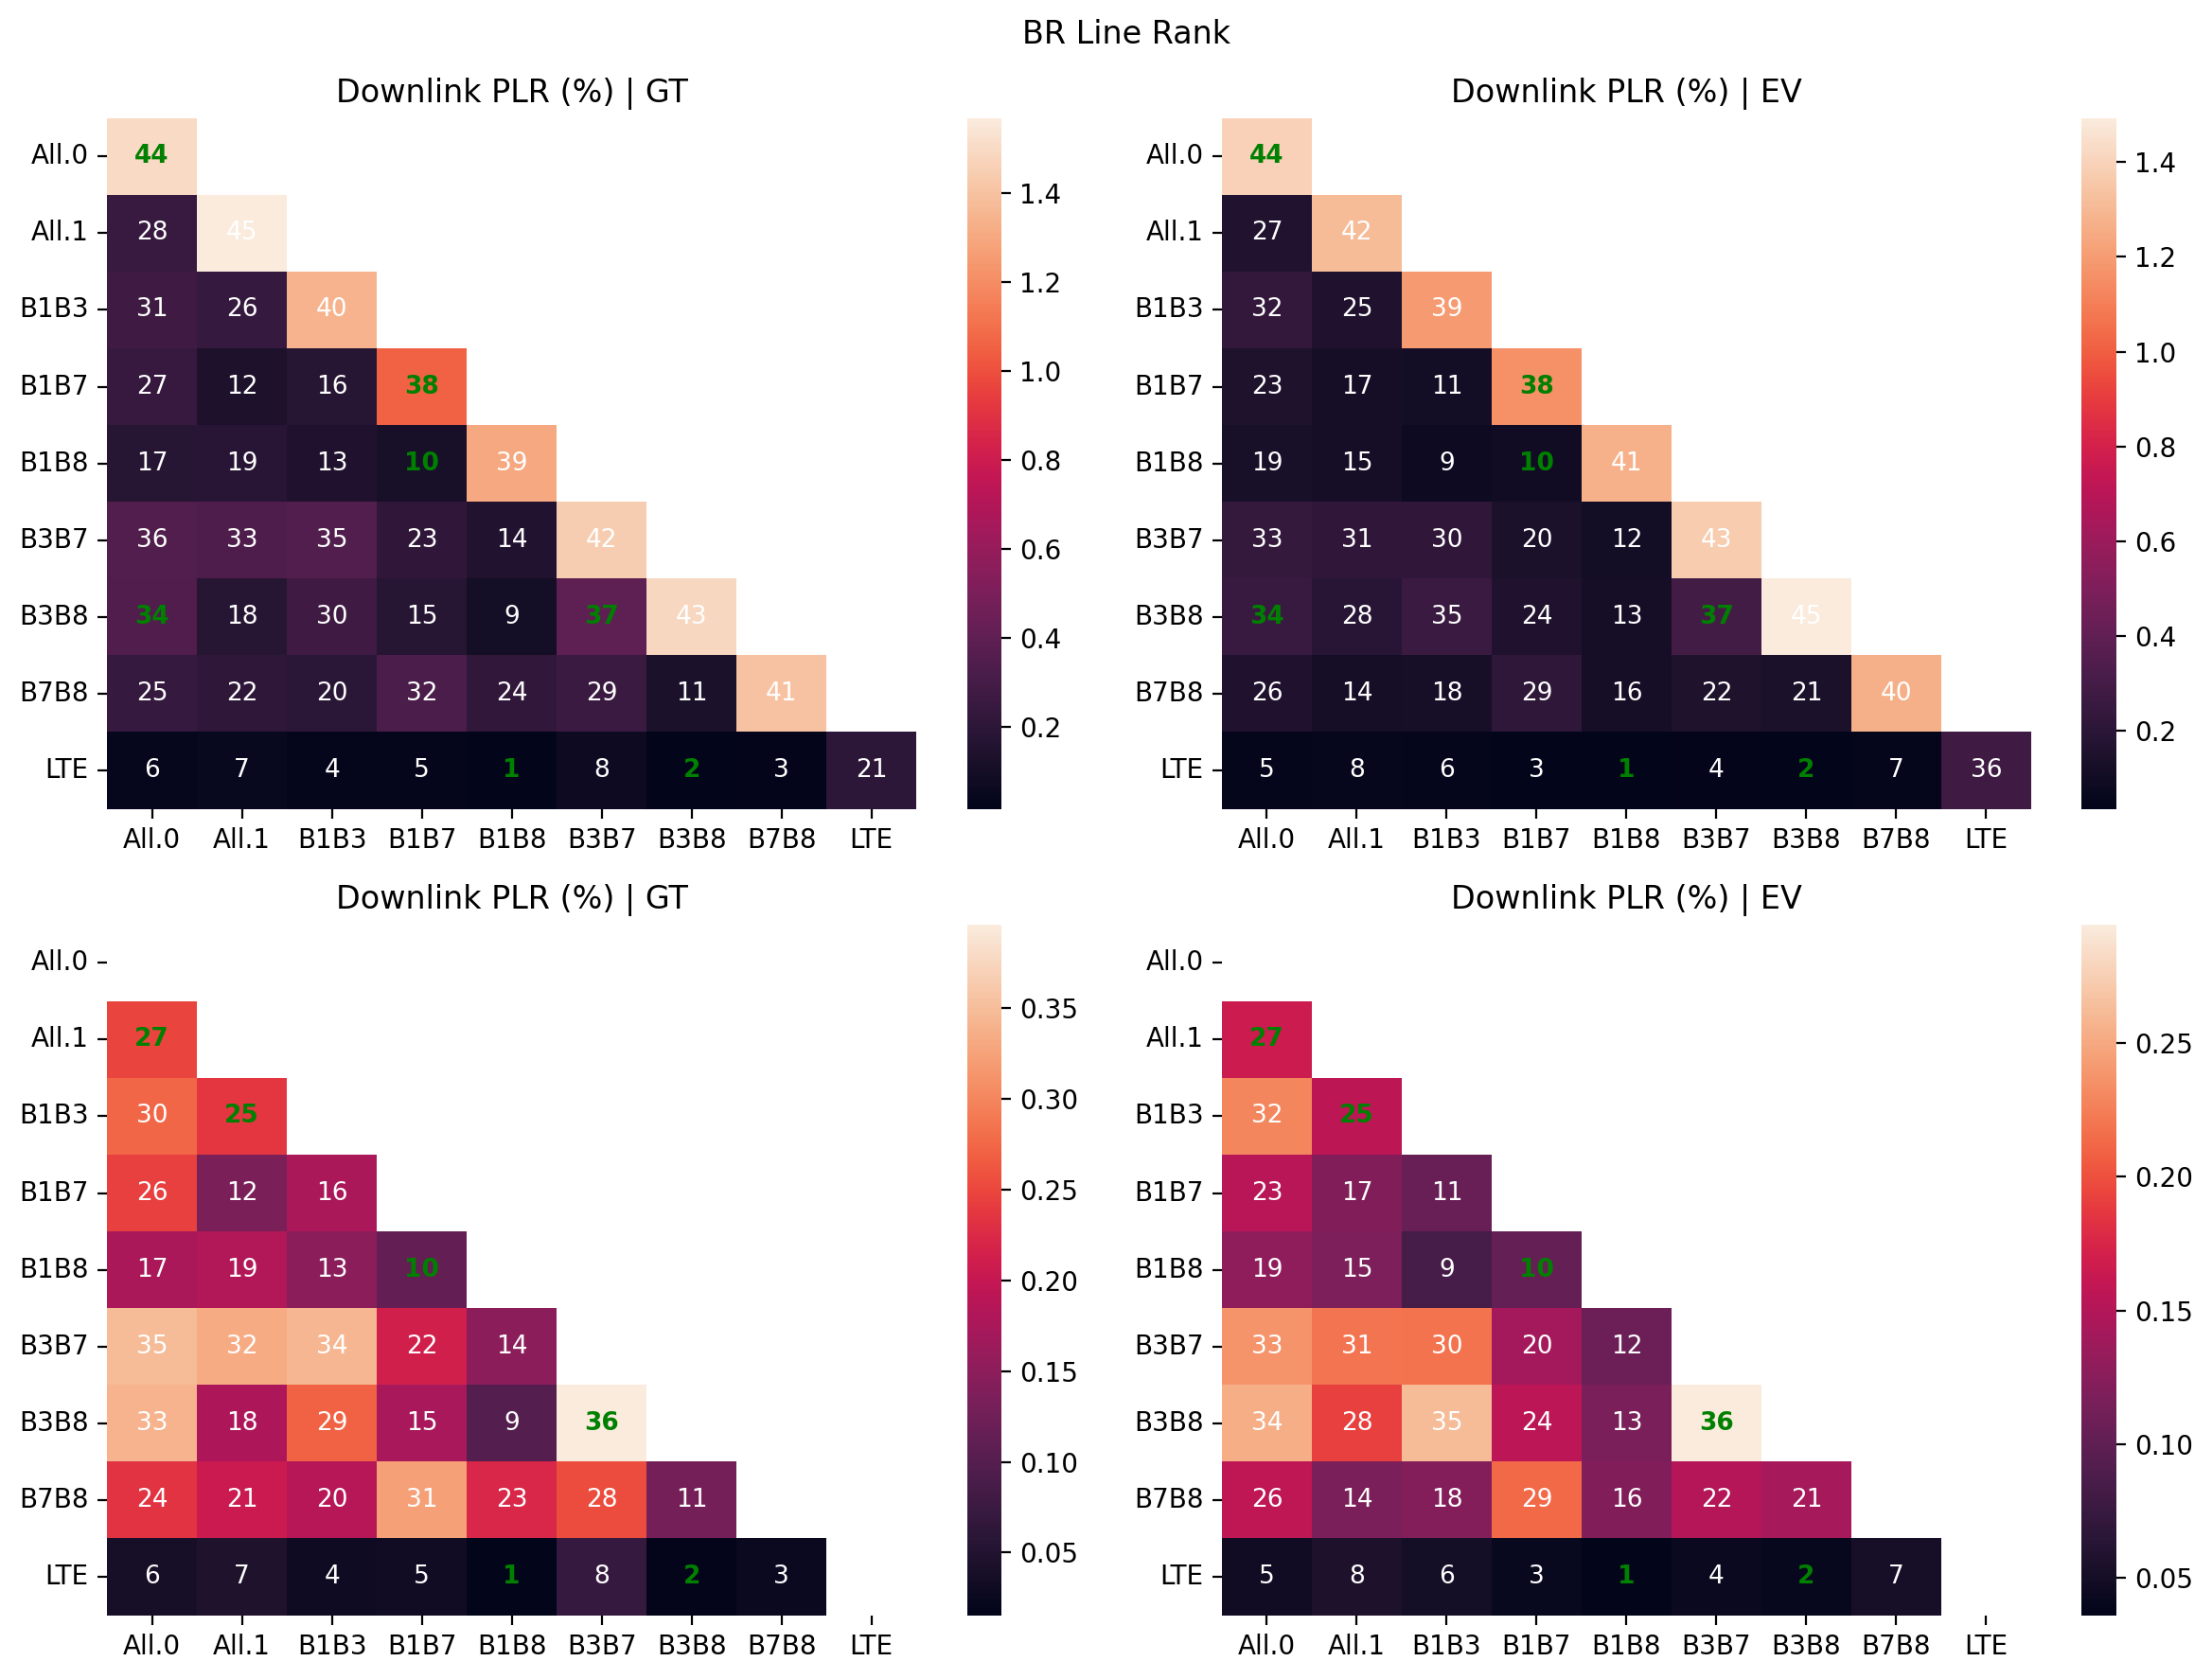

In [52]:
# Format Settings

devices = [f'sm{i:02d}' for i in range(9)]
schemes = ['All.0', 'All.1', 'B1B3', 'B1B7', 'B1B8', 'B3B7', 'B3B8', 'B7B8', 'LTE']
mapping = {key: schm for key, schm in zip(devices, schemes)}

print('scmehes:', schemes)

xs = list(it.product(schemes, repeat=2))
xs = ['+'.join([s[0], s[1]]) for s in xs]
xs = np.reshape(xs, (len(schemes), len(schemes)))
mtags = masked(xs.tolist(), mask(len(schemes), mode='upper'))

print('mtags:', mtags)

# Collect Data

gt_dict = {}

for i, item in enumerate(sr_res):
    dev = item[5]
    key = mapping[dev] + '+' + mapping[dev]
    try:
        gt_dict[key].append(item[3])
    except:
        gt_dict[key] = [item[3]]

for i, item in enumerate(dr_res):
    dev1, dev2 = item[5][:4], item[5][5:]
    key = mapping[dev1] + '+' + mapping[dev2]
    try:
        gt_dict[key].append(item[3])
    except:
        gt_dict[key] = [item[3]]
    
gt_dict = {key: np.mean(lst) for key, lst in gt_dict.items()}

print('gt_dict:', gt_dict)

ev_dict = {}

for i, item in enumerate(sr_res):
    dev = item[5]
    key = mapping[dev] + '+' + mapping[dev]
    try:
        ev_dict[key].append(item[1])
    except:
        ev_dict[key] = [item[1]]

for i, item in enumerate(dr_res):
    dev1, dev2 = item[5][:4], item[5][5:]
    key = mapping[dev1] + '+' + mapping[dev2]
    try:
        ev_dict[key].append(item[1])
    except:
        ev_dict[key] = [item[1]]
    
ev_dict = {key: np.mean(lst) for key, lst in ev_dict.items()}

print('ev_dict:', ev_dict)

# Plot

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# 有對角線
gt_mat = fill_out_matrix(schemes, mtags, gt_dict)
gt_ndarray = gt_mat.values
gt_ranked_ndarray = calculate_ranks(gt_ndarray)

ev_mat = fill_out_matrix(schemes, mtags, ev_dict)
ev_ndarray = ev_mat.values
ev_ranked_ndarray = calculate_ranks(ev_ndarray)

font_colors = set_font_colors(gt_ranked_ndarray, ev_ranked_ndarray)

sns.heatmap(gt_mat.T, annot=False, fmt='.2g', mask=mask(len(schemes)), annot_kws={"size": 6}, ax=axes[0][0])
annotate_heatmap(gt_ranked_ndarray.T, axes[0][0], font_colors=font_colors, show_diag=True)
axes[0][0].set_title('Downlink PLR (%) | GT')

sns.heatmap(ev_mat.T, annot=False, fmt='.2g', mask=mask(len(schemes)), annot_kws={"size": 6}, ax=axes[0][1])
annotate_heatmap(ev_ranked_ndarray.T, axes[0][1], font_colors=font_colors, show_diag=True)
axes[0][1].set_title('Downlink PLR (%) | EV')

# 無對角線
gt_mat = fill_out_matrix(schemes, mtags, gt_dict)
gt_ndarray = gt_mat.values
gt_ranked_ndarray = calculate_ranks(gt_ndarray, diag=False)

ev_mat = fill_out_matrix(schemes, mtags, ev_dict)
ev_ndarray = ev_mat.values
ev_ranked_ndarray = calculate_ranks(ev_ndarray, diag=False)

font_colors = set_font_colors(gt_ranked_ndarray, ev_ranked_ndarray)

sns.heatmap(gt_mat.T, annot=False, fmt='.2g', mask=mask(len(schemes), diag=False), annot_kws={"size": 6}, ax=axes[1][0])
annotate_heatmap(gt_ranked_ndarray.T, axes[1][0], font_colors=font_colors, show_diag=False)
axes[1][0].set_title('Downlink PLR (%) | GT')

sns.heatmap(ev_mat.T, annot=False, fmt='.2g', mask=mask(len(schemes), diag=False), annot_kws={"size": 6}, ax=axes[1][1])
annotate_heatmap(ev_ranked_ndarray.T, axes[1][1], font_colors=font_colors, show_diag=False)
axes[1][1].set_title('Downlink PLR (%) | EV')

fig.suptitle('BR Line Rank')
plt.tight_layout()
plt.show()
plt.close(fig)

# Airport

In [5]:
dr_res_filepath = "/home/wmnlab/jackbedford/udp-reliability-research/handover_profiling/20240417_1333007d66_new_data_sync_v2/dr_20240417_1452001e84_anchor_by_event/dl_lost/results/A_20240418_1558000_2914d_iter2.pkl"
sr_res_filepath = "/home/wmnlab/jackbedford/udp-reliability-research/handover_profiling/20240417_1333007d66_new_data_sync_v2/sr/dl_lost/results/A_20240417_1444002_9abb6_iter5.pkl"
with open(dr_res_filepath, 'rb') as f:
    dr_res = pickle.load(f)
with open(sr_res_filepath, 'rb') as f:
    sr_res = pickle.load(f)

scmehes: ['All.0', 'All.1', 'B1B3', 'B1B7', 'B1B8', 'B3B7', 'B3B8', 'B7B8', 'LTE']
mtags: [['All.0+All.0', 'All.0+All.1', 'All.0+B1B3', 'All.0+B1B7', 'All.0+B1B8', 'All.0+B3B7', 'All.0+B3B8', 'All.0+B7B8', 'All.0+LTE'], [0, 'All.1+All.1', 'All.1+B1B3', 'All.1+B1B7', 'All.1+B1B8', 'All.1+B3B7', 'All.1+B3B8', 'All.1+B7B8', 'All.1+LTE'], [0, 0, 'B1B3+B1B3', 'B1B3+B1B7', 'B1B3+B1B8', 'B1B3+B3B7', 'B1B3+B3B8', 'B1B3+B7B8', 'B1B3+LTE'], [0, 0, 0, 'B1B7+B1B7', 'B1B7+B1B8', 'B1B7+B3B7', 'B1B7+B3B8', 'B1B7+B7B8', 'B1B7+LTE'], [0, 0, 0, 0, 'B1B8+B1B8', 'B1B8+B3B7', 'B1B8+B3B8', 'B1B8+B7B8', 'B1B8+LTE'], [0, 0, 0, 0, 0, 'B3B7+B3B7', 'B3B7+B3B8', 'B3B7+B7B8', 'B3B7+LTE'], [0, 0, 0, 0, 0, 0, 'B3B8+B3B8', 'B3B8+B7B8', 'B3B8+LTE'], [0, 0, 0, 0, 0, 0, 0, 'B7B8+B7B8', 'B7B8+LTE'], [0, 0, 0, 0, 0, 0, 0, 0, 'LTE+LTE']]
gt_dict: {'All.0+All.0': 1.2448920242292667, 'All.1+All.1': 0.9554032541918335, 'B1B3+B1B3': 0.8484963127602696, 'B1B7+B1B7': 0.3837459726840743, 'B1B8+B1B8': 0.7426524982808809, 'B3B7+B3B

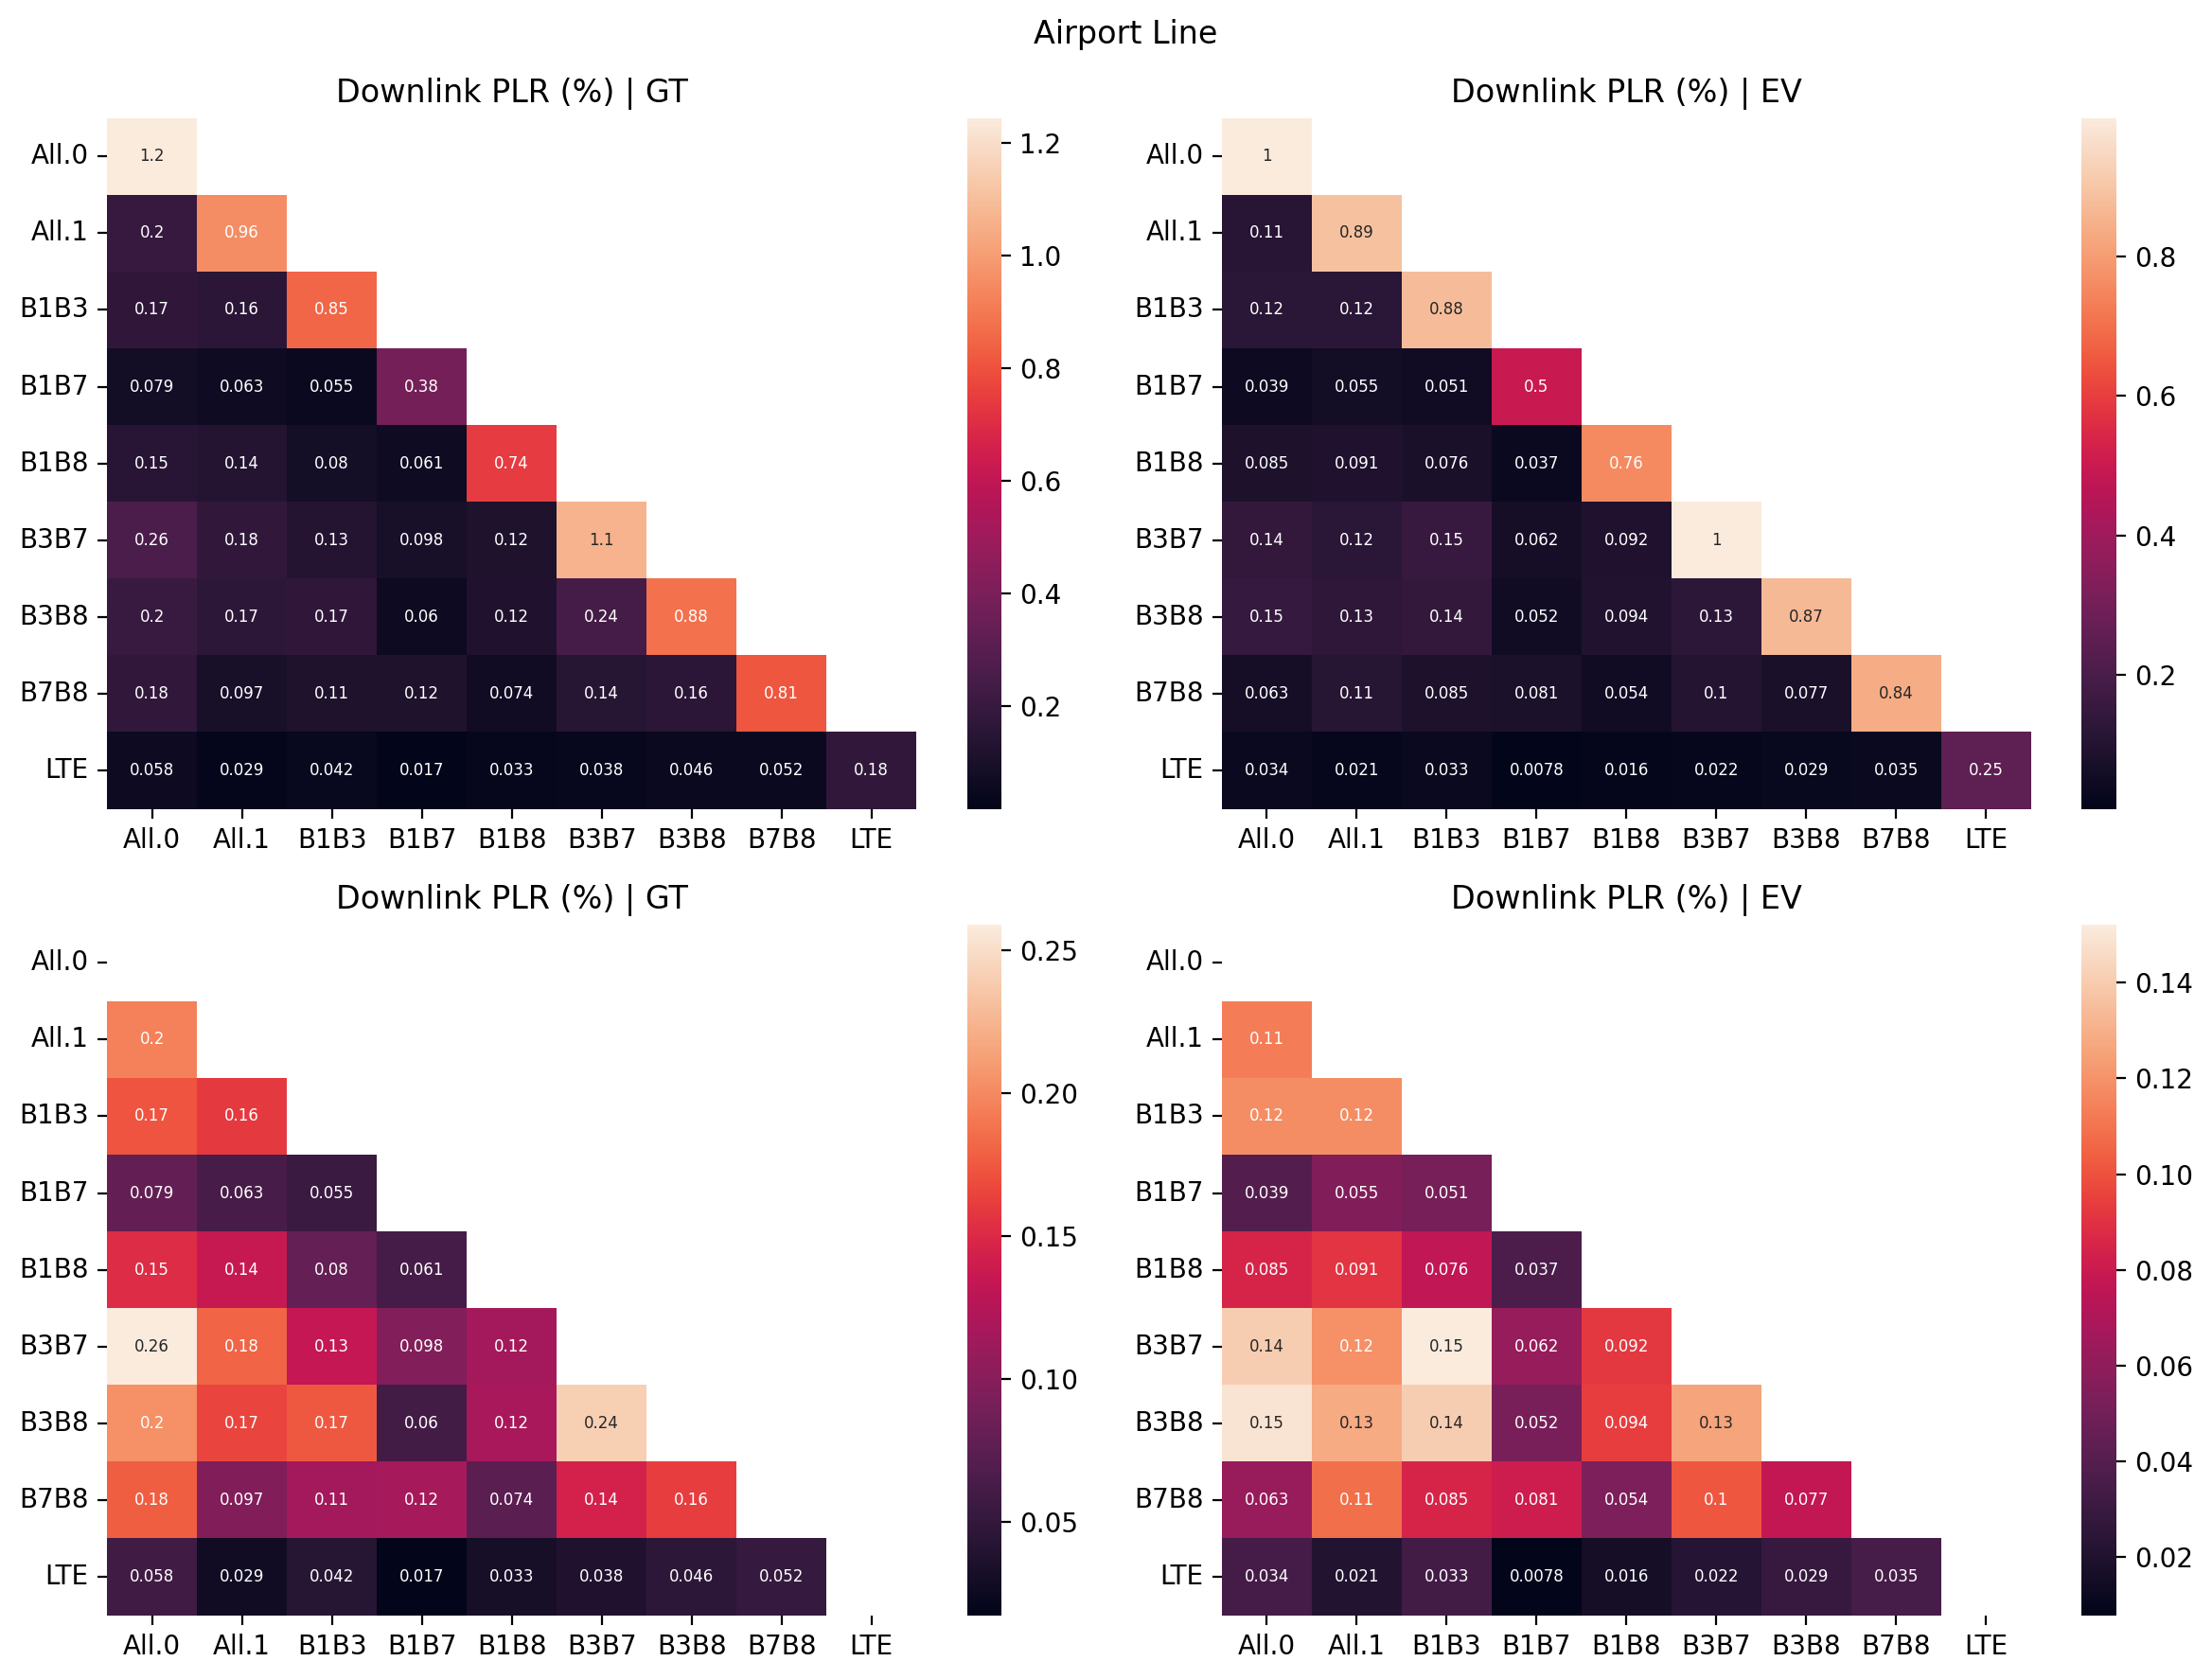

In [7]:
# Format Settings

devices = [f'sm{i:02d}' for i in range(9)]
schemes = ['All.0', 'All.1', 'B1B3', 'B1B7', 'B1B8', 'B3B7', 'B3B8', 'B7B8', 'LTE']
mapping = {key: schm for key, schm in zip(devices, schemes)}

print('scmehes:', schemes)

xs = list(it.product(schemes, repeat=2))
xs = ['+'.join([s[0], s[1]]) for s in xs]
xs = np.reshape(xs, (len(schemes), len(schemes)))
mtags = masked(xs.tolist(), mask(len(schemes), mode='upper'))

print('mtags:', mtags)

# Collect Data

gt_dict = {}

for i, item in enumerate(sr_res):
    dev = item[5]
    key = mapping[dev] + '+' + mapping[dev]
    try:
        gt_dict[key].append(item[3])
    except:
        gt_dict[key] = [item[3]]

for i, item in enumerate(dr_res):
    dev1, dev2 = item[5][:4], item[5][5:]
    key = mapping[dev1] + '+' + mapping[dev2]
    try:
        gt_dict[key].append(item[3])
    except:
        gt_dict[key] = [item[3]]
    
gt_dict = {key: np.mean(lst) for key, lst in gt_dict.items()}

print('gt_dict:', gt_dict)

ev_dict = {}

for i, item in enumerate(sr_res):
    dev = item[5]
    key = mapping[dev] + '+' + mapping[dev]
    try:
        ev_dict[key].append(item[1])
    except:
        ev_dict[key] = [item[1]]

for i, item in enumerate(dr_res):
    dev1, dev2 = item[5][:4], item[5][5:]
    key = mapping[dev1] + '+' + mapping[dev2]
    try:
        ev_dict[key].append(item[1])
    except:
        ev_dict[key] = [item[1]]
    
ev_dict = {key: np.mean(lst) for key, lst in ev_dict.items()}

print('ev_dict:', ev_dict)

# Plot

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# 有對角線
mat = fill_out_matrix(schemes, mtags, gt_dict)
sns.heatmap(mat.T, annot=True, fmt='.2g', mask=mask(len(schemes)), annot_kws={"size": 6}, ax=axes[0][0])
axes[0][0].set_title('Downlink PLR (%) | GT')

mat = fill_out_matrix(schemes, mtags, ev_dict)
sns.heatmap(mat.T, annot=True, fmt='.2g', mask=mask(len(schemes)), annot_kws={"size": 6}, ax=axes[0][1])
axes[0][1].set_title('Downlink PLR (%) | EV')

# 無對角線
mat = fill_out_matrix(schemes, mtags, gt_dict)
sns.heatmap(mat.T, annot=True, fmt='.2g', mask=mask(len(schemes), diag=False), annot_kws={"size": 6}, ax=axes[1][0])
axes[1][0].set_title('Downlink PLR (%) | GT')

mat = fill_out_matrix(schemes, mtags, ev_dict)
sns.heatmap(mat.T, annot=True, fmt='.2g', mask=mask(len(schemes), diag=False), annot_kws={"size": 6}, ax=axes[1][1])
axes[1][1].set_title('Downlink PLR (%) | EV')

fig.suptitle('Airport Line')
plt.tight_layout()
plt.show()
plt.close(fig)